In [10]:
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np

In [25]:
arrow_test = cv2.imread('./images/train/r1.jpg')

In [26]:
output_img_36 = cv2.resize(arrow_test, (48, 48), interpolation = cv2.INTER_AREA)

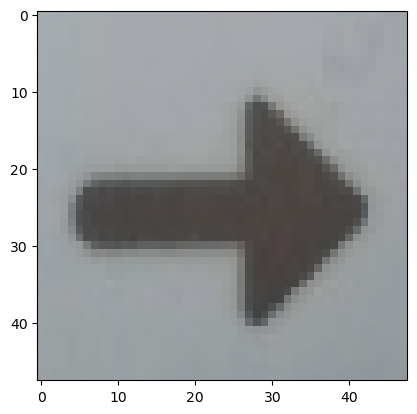

In [27]:
plt.imshow(output_img_36)

In [70]:
def make_image(crop_img2):
    (cX, cY) = (24, 24)
    
    # -15 ~ 15 범위 무작위 회전
    M = cv2.getRotationMatrix2D((cX, cY), random.randint(-15, 15), 1.0)
    rotated_45 = cv2.warpAffine(crop_img2, M, (48, 48))
    
    # -2 ~ 2 범위 무작위 이동
    M = np.float32([[1, 0, random.randint(-2, 2)], 
                    [0, 1, random.randint(-2, 2)]])
    shifted = cv2.warpAffine(rotated_45, M, (rotated_45.shape[1], rotated_45.shape[0]))

    # 그레이 스케일 및 이진화
    gray_img = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
    ret, th1 = cv2.threshold(gray_img, 150, 255, cv2.THRESH_BINARY)
    return th1
    

In [29]:
gimg_list = []

In [30]:
for i in range(40000):
    test_img = cv2.imread('./images/train/d1.jpg')
    
    out = test_img.copy()
    out = 255 - out
    
    # 48 x 48
    output_img_48 = cv2.resize(out, (48, 48), interpolation = cv2.INTER_AREA)
    
    # 1배 ~ 1.2 배 무작위 확대
    mul = random.uniform(1.0, 1.2)
    dst2 = cv2.resize(output_img_48, None,  None, mul, mul, cv2.INTER_CUBIC)
    height, width = dst2.shape[:2]
    half_h, half_w = int(height / 2), int(width / 2)
    crop_img2 = dst2[half_h-24:half_h+24, half_w-24:half_w+24]
    
    if i < 10000:
        th1 = make_image(crop_img2)
        gimg_list.append(th1)
    elif i < 20000:
        M = cv2.getRotationMatrix2D((24, 24), 90, 1.0)
        rotated_90 = cv2.warpAffine(crop_img2, M, (48, 48))
        th1 = make_image(rotated_90)
        gimg_list.append(th1)
    elif i < 30000:
        M = cv2.getRotationMatrix2D((24, 24), 180, 1.0)
        rotated_180 = cv2.warpAffine(crop_img2, M, (48, 48))
        th1 = make_image(rotated_180)
        gimg_list.append(th1)
    elif i < 40000:
        M = cv2.getRotationMatrix2D((24, 24), 270, 1.0)
        rotated_270 = cv2.warpAffine(crop_img2, M, (48, 48))
        th1 = make_image(rotated_270)
        gimg_list.append(th1)

In [63]:
gimg_list = []

In [85]:
# 숫자 이미지

for i in range(10000):
    test_img = cv2.imread('./images/train/five3.jpg')
    
    out = test_img.copy()
    out = 255 - out
    
    # 48 x 48
    output_img_48 = cv2.resize(out, (48, 48), interpolation = cv2.INTER_AREA)

    th1 = make_image(output_img_48)
    gimg_list.append(th1)

In [79]:
# gimg_list = gimg_list[:10000]

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


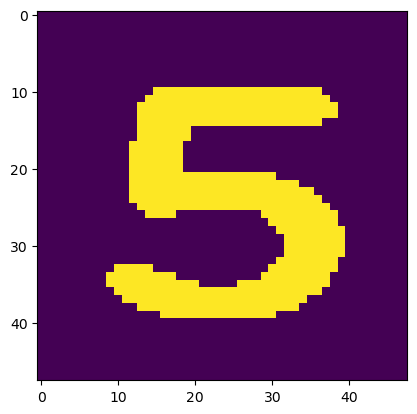

In [86]:
plt.imshow(gimg_list[79999])
print(gimg_list[79999])

In [87]:
arrow_img_array = np.array(gimg_list)

In [88]:
arrow_img_array.shape

(80000, 48, 48)

In [38]:
y_list = []


for i in range(40000):
    if i < 10000:
        y_list.append('d')
        
    elif i < 20000:
        y_list.append('r')
        
    elif i < 30000:
        y_list.append('u')
        
    elif i < 40000:
        y_list.append('l')

In [89]:
y_list = []

for i in range(80000):
    if i < 20000:
        y_list.append('2')
        
    elif i < 40000:
        y_list.append('3')
        
    elif i < 60000:
        y_list.append('4')
        
    elif i < 80000:
        y_list.append('5')

In [90]:
label_array = np.array(y_list)

In [91]:
label_array.shape

(80000,)

In [92]:
X_train = arrow_img_array
y_train = label_array

# Shape

In [93]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [94]:
input_shape = X_train.shape[1] * X_train.shape[2]
number_of_classes = len(set(y_train))

In [95]:
X_train = X_train / 255.0
X_train = X_train.reshape(-1, input_shape)

In [96]:
print(f"X_train_shape: {X_train.shape}")

X_train_shape: (80000, 2304)


In [97]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoder.fit(y_train)

LabelEncoder()

In [103]:
y_train

array(['2', '2', '2', ..., '5', '5', '5'], dtype='<U1')

In [99]:
labeled_y_train = encoder.transform(y_train)

In [104]:
labeled_y_train

array([0, 0, 0, ..., 3, 3, 3])

In [105]:
y_train = to_categorical(labeled_y_train, number_of_classes)  # 원-핫 인코딩. 1차원 -> 2차원

# 모델 학습

In [106]:
model = Sequential()

In [107]:
model.add(Dense(128, activation="relu", input_shape=X_train.shape[1:]))

model.add(Dense(y_train.shape[1], activation="softmax"))

In [108]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('./model/best_model_01.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["acc"])

model.summary()  # 간단하게 요약해 출력

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               295040    
                                                                 
 dense_4 (Dense)             (None, 4)                 516       
                                                                 
Total params: 295556 (1.13 MB)
Trainable params: 295556 (1.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [109]:
history = model.fit(X_train, y_train, batch_size=32, callbacks=[mc], epochs=10, validation_split=0.2)

Epoch 1/10
1989/2000 [============================>.] - ETA: 0s - loss: 0.0018 - acc: 0.9995
Epoch 1: val_acc improved from -inf to 1.00000, saving model to ./model\best_model_01.h5
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0018 - acc: 0.9995 - val_loss: 3.9097e-04 - val_acc: 1.0000
Epoch 2/10
  46/2000 [..............................] - ETA: 6s - loss: 3.2629e-06 - acc: 1.0000

C:\Users\jjun\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1997/2000 [============================>.] - ETA: 0s - loss: 1.4832e-06 - acc: 1.0000
Epoch 2: val_acc did not improve from 1.00000
2000/2000 [==============================] - 7s 4ms/step - loss: 1.4820e-06 - acc: 1.0000 - val_loss: 1.3408e-04 - val_acc: 1.0000
Epoch 3/10
1996/2000 [============================>.] - ETA: 0s - loss: 3.3824e-07 - acc: 1.0000
Epoch 3: val_acc did not improve from 1.00000
2000/2000 [==============================] - 7s 4ms/step - loss: 3.3808e-07 - acc: 1.0000 - val_loss: 7.1988e-05 - val_acc: 1.0000
Epoch 4/10
1992/2000 [============================>.] - ETA: 0s - loss: 9.8370e-08 - acc: 1.0000
Epoch 4: val_acc did not improve from 1.00000
2000/2000 [==============================] - 7s 4ms/step - loss: 9.8165e-08 - acc: 1.0000 - val_loss: 3.8929e-05 - val_acc: 1.0000
Epoch 5/10
1995/2000 [============================>.] - ETA: 0s - loss: 3.1098e-08 - acc: 1.0000
Epoch 5: val_acc did not improve from 1.00000
2000/2000 [==============================] - 7